In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [ ]:
clinical_data_csv = pd.read_csv('Z:\covlus_bmicnas02\clinical_data.csv') #Exchange Z: to your local name
clinical_data_csv

(just for testing stuff)

In [3]:
# print((clinical_data_csv[clinical_data_csv['Video ID (found)'] == 'A001']).values.tolist())
# print(list(clinical_data_csv['avail_data#Covid19_vaccination_info']))
for row, (x, y) in enumerate(zip(
                            clinical_data_csv['clin_diagn#COVID19_pneumonia'], 
                            clinical_data_csv['cov_test'])):
    if x != 1-y:
        print( row, x, 1-y)

In [12]:
print(clinical_data_csv.at[7, 'pat_ID'])

8.0


### Data cleaning

In [54]:
unsuitable_columns = [
    'Video ID (found)', #Added with new clinical data version
    # 'Castor ID',      #depricated with new clinical data version
    'Video ID',         #Some videos are missing, so we should use 'Video ID (found)' for mapping
    'Number of video files',
    'Video path',
    # 'Record Id',     #depricated with new clinical data version
    'Record Creation Date',
    'pat_ID',
    'adm_date',
    'Appl_incl_crit', 
    'excl_crit#18_years_old', 
    'excl_crit#pregnant',
    'excl_crit#contraindications_for_lung_ultrasound',
    'excl_crit#none_of_the_above_exclusion_criteria_apply',
    'inform_consent',
    'date_inform_consent',
    'patient_symp#Other',
    'oth_sympt',
    'vent_dep#Yes',
    'vent_dep#No',
    'oxygen_liter',
    'application_method#mask',
    'application_method#sonde_tube',
    'application_method#other',
    'other_appl',
    'other_pulm_dis',
    'dx_his_smoke',
    'smok_packy_packd',
    'oth_comorbidities#Chronic_cardiovascular_disease',
    'oth_comorbidities#Adipositas_BMI_30',
    'oth_comorbidities#Diabetes_Mellitus',
    'oth_comorbidities#Hypertonia',
    'oth_comorbidities#Liver_disease',
    'oth_comorbidities#Renal_disease',
    'oth_comorbidities#Malignancy',
    'oth_comorbidities#AIDSHIV',
    'oth_comorbidities#Autoimmune_disease',
    'oth_comorbidities#Neurological_condition',
    'oth_comorbidities#Stroke',
    'oth_comorbidities#History_of_drug_or_alcohol_abuse',
    'oth_comorbidities#None_of_the_above',
    'curr_medis#Immunosuppressive_medication_eg_Glucocorticoids_eg_Cortisol_Cortison_Prednisolon_Dexamethason_Budesonid_Fluticason_Azathioprine_Methotrexate_Biologicals_eg_Omalizumab_Bevacizumab_Infliximab_Adalimumab_Etanercept_CiclosporinCiclosporin_A_TacrolimusFK506',
    'curr_medis#ACEblockers_eg_Ramipril_Enalapril',
    'curr_medis#Ibuprofen',
    'curr_medis#other',
    'curr_medis#no_medication',
    'dx_medic',
    'avail_data#Lung_Ultrasound',
    'avail_data#PCR',
    'avail_data#XRay',
    'avail_data#CT',
    'avail_data#arterialblood_gas_analysis',
    'avail_data#complete_blood_count',
    'avail_data#other',
    'avail_data#CRP',
    'avail_data#Blood_Type',
    'xray_find',
    'CT_find',
    'oth_find',
    'cov_test',
    'date_covid_test',
    'test_meth_covid#PCR_normal',
    'test_meth_covid#PCR_rapid_test',
    'test_meth_covid#Other',
    'oth_test_meth',
    'PCR_CT',
    # 'clin_diagn#COVID19_pneumonia',       #needed for classification
    'clin_diagn#other_viral_pneumonia',
    'clin_diagn#bacterial_pneumonia',
    'clin_diagn#other_lung_disease',
    'clin_diagn#healthy_lung',
    'oth_diagn',
    'vir_diagn',
    'bact_diagn',
    'date_d0',
    'outcome_status_d0',
    'date_d1',
    'outcome_status_d1',
    'date_d3',
    'outcome_status_d3',
    'date_d5',
    'outcome_status_d5',
    'date_d7',
    'outcome_status_d7',
    'date_d30',
    'outcome_status_d30',
    'dis_date',
    'discharge_to',
    'los_totaladmission',
    'stay_genward',
    'stay_gwadm',
    'stay_gwdisch',
    'los_gw',
    'stay_mcu',
    'stay_mcuadm',
    'stay_mcudisch',
    'los_MCU',
    'stay_icu',
    'stay_icuadm',
    'stay_icudisch',
    'los_ICU',
    'ward_transfer_1',
    'Transfer_1_to',
    'stay_transfergw_1',
    'stay_dischgw_1',
    'los_transfergw_1',
    'stay_transfermcu_1',
    'stay_dischmcu_1',
    'los_transfermcu_1',
    'stay_transfericu_1',
    'stay_dischicu_1',
    'los_transfericu_1',
    'ward_transfer_2',
    'Transfer_2_to',
    'stay_transfergw_2',
    'stay_dischgw_2',
    'los_transfergw_2',
    'stay_transfermcu_2',
    'stay_dischmcu_2',
    'los_transfermcu_2',
    'stay_transfericu_2',
    'stay_dischicu_2',
    'los_transfericu_2',
    'oxygen_thepary',
    'oxygen_application_method_1#mask',
    'oxygen_application_method_1#sonde_tube',
    'oxygen_application_method_1#other',
    'oxygen_other_appl',
    'start_oxy',
    'end_oxy',
    'duration_oxy',
    'oxygen_thepary_2',
    'oxygen_application_method_2#mask',
    'oxygen_application_method_2#sonde_tube',
    'oxygen_application_method_2#other',
    'oxygen_other_appl_2',
    'start_oxy_2',
    'end_oxy_2',
    'duration_oxy_2',
    'add_remarks',
    'pos_bp',
    'datetime_bp',
    'report_date_bp',
    'vacc_date', #Too many nans, default value should be inf, bc 0 means they where vacc that day
    'oxygen_saturation_with_ox', #Oxygen is only given to patients with lung desease
    'Blood_type', #Too many nans/What should default value be?
    'Rh_factor', #Same as above
    'C19_vacc', #Mostly nans
    'emerg_case#No', 
    'avail_data#Covid19_vaccination_info',
    'absolute_lymphocytes' #I put absolute value for lymphocytes here, but we have to ask, what is more meaningful
    
]

suitable_columns = [ 
    'incl_crit#fever_or_chills',
    'incl_crit#cough',
    'incl_crit#shortness_of_breath_or_difficulty_breathing',
    'incl_crit#loss_of_taste',
    'incl_crit#loss_of_smell',
    'incl_crit#sore_throat',
    'incl_crit#congestion',
    'incl_crit#runny_nose',
    'pat_birth_year',
    'pat_sex',
    'pat_height',
    'pat_weight',
    'pat_bmi',
    'patient_symp#Fever',
    'patient_symp#Coughing',
    'patient_symp#Sore_throat',
    'patient_symp#Running_nose',
    'patient_symp#Earache',
    'patient_symp#Wheezing',
    'patient_symp#Chest_pain',
    'patient_symp#Muscle_pain',
    'patient_symp#Joint_pain',
    'patient_symp#Fatigue',
    'patient_symp#Dyspnea',
    'patient_symp#Headache',
    'patient_symp#Decreased_consciousness',
    'patient_symp#Confusion',
    'patient_symp#Abdominal_pain',
    'patient_symp#Nausea',
    'patient_symp#Vomitting',
    'patient_symp#Diarrhea',
    'patient_symp#Skin_rash',
    'patient_symp#Lymphadenopathy',
    'patient_symp#AgeusiaDysgeusia',
    'patient_symp#AnosmiaHyposmia',
    'oxygen_saturation_without_ox',
    'respiratory_rate',
    'pulse',
    'body_temperature',
    'emerg_case#Yes',
    'hist_pulm_dis',
    'applying_pulm_dis#Asthma_bronchiale',
    'applying_pulm_dis#COPD',
    'applying_pulm_dis#Pneumonia',
    'applying_pulm_dis#Interstitial_Lung_Disease',
    'applying_pulm_dis#Diffuse_Parenchymal_Lung_Disease',
    'applying_pulm_dis#Cystic_fibrosis',
    'applying_pulm_dis#Pneumothorax',
    'applying_pulm_dis#Tuberculosis',
    'applying_pulm_dis#Dyspnea',
    'applying_pulm_dis#Other',
    'smok_years',
    'pH_find',
    'pCO2_find',
    'pO2_find',
    'HCO3_find',
    'excess_find',
    'hg_find',
    'trombocytes_find',
    'leucocytes_find',
    'lymphocytes',
    'LDH_find',
    'CRP',
    # 'Blood_type',
    # 'Rh_factor',
    # 'C19_vacc',
    'sys_bp',
    'dias_bp',
    'dur_symp'
    
    
 ]

blood_test_features = [
    'hg_find',              #Hemoglobin count in g/dl ??
    'trombocytes_find',     #Blood cells
    'leucocytes_find',      #White blood cells
    'lymphocytes',
    'LDH_find',             #Enzyme, high values indicate tissue damage
    'CRP',                  #c-reactive Protein, indicating inflammation
    'pH_find',              #pH value range indicates blood-test, but might be something else
    'pCO2_find',
    'pO2_find',
    'HCO3_find',

]

needs_cleaning = [
    # 'oxygen_saturation_without_ox',
    # 'respiratory_rate', #-99
    # 'pulse', #-99
    # 'body_temperature', #-99
    # 'smok_years' #nan -> 0
    # 'pH_find',
    # 'pCO2_find',
    # 'pO2_find',
    # 'HCO3_find',
    # 'excess_find',
    # 'hg_find',
    # 'trombocytes_find',
    # 'leucocytes_find',
    # 'lymphocytes_find',         #Questions aboutthis
    # 'LDH_find',
    # 'CRP',
    # 'Blood_type', #Mapping?
    # 'Rh_factor', #What should nan be?
    # 'C19_vacc', #What should nan be?
    # 'dias_bp', #One nan
 ]

In [43]:
print(set(unsuitable_columns) - set(suitable_columns) == set(unsuitable_columns))
print(set(clinical_data_csv.columns) - set(unsuitable_columns) - set(suitable_columns))

True
{'clin_diagn#COVID19_pneumonia'}


Drop columns that can not be used in training as well as last row

In [44]:
input_data = clinical_data_csv.drop(unsuitable_columns, axis=1)

### Data cleaning

Convert everything to floats

In [45]:
# input_data.at[ind_val, 'oxygen_saturation_with_ox'] = 91.0        #Change '90-92' to 91 
input_data.at[55, 'body_temperature'] = 36.6                        #Change '36,6' to 36.6
input_data.at[8, 'CRP'] = 0.5                                       #Change '<1' to 0.5
input_data.at[26, 'CRP'] = 0.5                                      #Change '<1' to 0.5
input_data.at[60, 'body_temperature'] = 37.1                        #Change 7.1 to 37.1

input_data = input_data.astype(float)                               #Turn all values into floats

In [46]:
#Filter -99 and make it nan
for col in input_data.columns:
    for ind_val, val in enumerate(input_data[col]): 
        if val == (-99.0 or '-99.0'):
            input_data.at[ind_val, col] = np.nan
        

In [47]:
#Fill nan with mean or median
for col in input_data.columns:
    _, p = scipy.stats.skewtest(input_data[col].tolist(), nan_policy = 'omit')

    median = np.nanmedian(input_data[col])
    mean = np.mean(input_data[col])
    
    if col == 'smok_years':
        input_data[col] = input_data[col].fillna(0)
    elif p < 0.05:
        input_data[col] = input_data[col].fillna(median)    
    elif p > 0.05:
        input_data[col] = input_data[col].fillna(mean)

### Data analysis

In [48]:
data_cov_neg = input_data[input_data['clin_diagn#COVID19_pneumonia'] == 0]
data_cov_pos = input_data[input_data['clin_diagn#COVID19_pneumonia'] == 1]
res_list = []
for i, col in enumerate(input_data.columns):
    cross_tab = pd.crosstab(index=input_data[col], columns=input_data['clin_diagn#COVID19_pneumonia'])
    chi_square_result = scipy.stats.chi2_contingency(cross_tab)


    res_dict = {
        "Attribute": col,
        "Average value COVID pos": np.nanmean(data_cov_pos[col]),
        "Average value COVID neg": np.nanmean(data_cov_neg[col]),
        "Significance level (Chi-Square test)": chi_square_result[1],
        "Significance level (t-test)": scipy.stats.ttest_ind(data_cov_pos[col].dropna(), data_cov_neg[col].dropna())[1],
        "Unique values": np.unique(input_data[col]),
                }
    res_list.append(res_dict)
    
castor_data_analysis = pd.DataFrame(res_list).set_index("Attribute")

In [49]:
castor_data_analysis

,Average value COVID pos,Average value COVID neg,Significance level (Chi-Square test),Significance level (t-test),Unique values
Attribute,,,,,
incl_crit#fever_or_chills,0.361111,0.28125,6.577936e-01,0.489654,"[0.0, 1.0]"
incl_crit#cough,0.638889,0.56250,6.933452e-01,0.527620,"[0.0, 1.0]"
incl_crit#shortness_of_breath_or_difficulty_breathing,0.944444,0.90625,8.911174e-01,0.553889,"[0.0, 1.0]"
incl_crit#loss_of_taste,0.083333,0.00000,2.807194e-01,0.097620,"[0.0, 1.0]"
incl_crit#loss_of_smell,0.055556,0.03125,1.000000e+00,0.632263,"[0.0, 1.0]"
...,...,...,...,...,...
LDH_find,371.305556,240.28125,5.323285e-01,0.000004,"[134.0, 146.0, 155.0, 159.0, 169.0, 177.0, 186..."
CRP,111.444444,50.18750,1.028023e-01,0.001538,"[0.5, 2.0, 3.0, 9.0, 11.0, 12.0, 15.0, 16.0, 1..."
clin_diagn#COVID19_pneumonia,1.000000,0.00000,1.215883e-15,0.000000,"[0.0, 1.0]"


In [50]:
signif_data = []
for ind in castor_data_analysis.index:
    if len(castor_data_analysis['Unique values'][ind]) == 2:
        if castor_data_analysis['Significance level (Chi-Square test)'][ind] < 0.1:
            signif_data.append(ind)
    else:
        if castor_data_analysis['Significance level (t-test)'][ind] < 0.1:
            signif_data.append(ind)

signif_features = input_data[signif_data].drop(['clin_diagn#COVID19_pneumonia'], axis=1)

print(list(signif_features.columns))

['patient_symp#Muscle_pain', 'patient_symp#Fatigue', 'oxygen_saturation_without_ox', 'respiratory_rate', 'body_temperature', 'smok_years', 'pCO2_find', 'hg_find', 'leucocytes_find', 'LDH_find', 'CRP']


<Figure size 432x288 with 0 Axes>

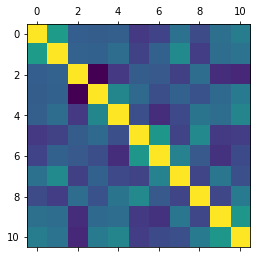

In [51]:
fig = plt.figure()
plt.matshow(signif_features.corr())

In [52]:
input_data.corr()
# sns.heatmap(input_data.corr())
# plt.show()

,incl_crit#fever_or_chills,incl_crit#cough,incl_crit#shortness_of_breath_or_difficulty_breathing,incl_crit#loss_of_taste,incl_crit#loss_of_smell,incl_crit#sore_throat,incl_crit#congestion,incl_crit#runny_nose,dur_symp,pat_birth_year,...,excess_find,hg_find,trombocytes_find,leucocytes_find,lymphocytes,LDH_find,CRP,clin_diagn#COVID19_pneumonia,sys_bp,dias_bp
incl_crit#fever_or_chills,1.000000,-0.081252,-0.166488,0.157576,0.004502,0.251716,NaN,0.157576,-0.106558,0.223022,...,-0.038206,-0.077523,0.009196,0.201740,0.116851,-0.042378,0.198520,0.085206,0.075457,-0.103684
incl_crit#cough,-0.081252,1.000000,0.001693,0.027980,-0.118378,0.141264,NaN,0.027980,-0.159013,0.025312,...,0.091983,0.125840,0.105390,-0.153269,-0.205571,0.065773,-0.082725,0.077926,-0.090539,-0.076306
incl_crit#shortness_of_breath_or_difficulty_breathing,-0.166488,0.001693,1.000000,-0.488217,-0.488217,0.049041,NaN,-0.213847,0.046464,-0.017935,...,0.002328,-0.071043,0.074070,-0.053554,-0.045809,0.092309,0.019505,0.073042,-0.006095,0.075884
incl_crit#loss_of_taste,0.157576,0.027980,-0.488217,1.000000,0.651282,-0.037398,NaN,-0.046154,-0.012648,0.076053,...,-0.146224,0.237491,-0.063757,-0.043584,-0.035228,0.150703,0.046907,0.202548,0.061650,0.026310
incl_crit#loss_of_smell,0.004502,-0.118378,-0.488217,0.651282,1.000000,-0.037398,NaN,-0.046154,0.574040,-0.012390,...,-0.031334,0.294776,-0.113755,-0.020587,-0.010170,0.020239,0.011603,0.059076,0.133805,0.070876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LDH_find,-0.042378,0.065773,0.092309,0.150703,0.020239,-0.125800,NaN,-0.147171,-0.053584,-0.220260,...,-0.118136,0.127094,-0.061809,-0.130642,-0.323405,1.000000,0.322676,0.527192,0.216057,0.140468
CRP,0.198520,-0.082725,0.019505,0.046907,0.011603,0.131693,NaN,-0.111959,-0.100703,0.024508,...,-0.116084,-0.086657,0.150021,0.146503,-0.187719,0.322676,1.000000,0.376832,0.018104,-0.073960
clin_diagn#COVID19_pneumonia,0.085206,0.077926,0.073042,0.202548,0.059076,-0.010258,NaN,-0.084395,-0.089397,-0.070748,...,-0.102129,0.339038,-0.153955,-0.231053,-0.182171,0.527192,0.376832,1.000000,0.055007,0.013561
sys_bp,0.075457,-0.090539,-0.006095,0.061650,0.133805,-0.337384,NaN,-0.176461,0.136960,-0.592132,...,0.013666,0.007557,0.249789,0.216864,-0.139607,0.216057,0.018104,0.055007,1.000000,0.543021


In [55]:
data_training = input_data.drop(['clin_diagn#COVID19_pneumonia'], axis=1)

features = np.array(data_training)
features_sign = np.array(signif_features)
features_no_bt = np.array(data_training.drop(blood_test_features, axis=1))

label = input_data["clin_diagn#COVID19_pneumonia"].values

print(features_sign.shape, features.shape, features_no_bt.shape, label.shape, np.unique(label, return_counts=True))

(68, 11) (68, 66) (68, 56) (68,) (array([0., 1.]), array([32, 36], dtype=int64))


Sensitivity $= TPR = \frac{TP}{P}$  
Specificity $= TNR = \frac{TN}{N}$  
Accuracy $= \frac{TP + TN}{P + N}$

In [56]:
sensitivity = make_scorer(recall_score, pos_label=1)
specificity = make_scorer(recall_score, pos_label=0)
eval_metrics = {'accuracy': 'accuracy', 'sensitivity': sensitivity, 'specificity': specificity}

In [57]:
clf = LogisticRegression()
scores = cross_validate(clf, features, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
log_reg_acc = np.mean(scores["test_accuracy"])
log_reg_sens = np.mean(scores['test_sensitivity'])
log_reg_spec = np.mean(scores['test_specificity'])
print(log_reg_acc, log_reg_sens, log_reg_spec)

0.7483516483516484 0.7714285714285714 0.7142857142857142


f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [58]:
clf = LogisticRegression()
scores = cross_validate(clf, features_sign, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
log_reg_acc_sign = np.mean(scores["test_accuracy"])
log_reg_sens_sign = np.mean(scores['test_sensitivity'])
log_reg_spec_sign = np.mean(scores['test_specificity'])
print(log_reg_acc_sign, log_reg_sens_sign, log_reg_spec_sign)

0.7945054945054946 0.8321428571428571 0.7476190476190476


f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [59]:
clf = LogisticRegression()
scores = cross_validate(clf, features_no_bt, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
log_reg_acc_no_bt = np.mean(scores["test_accuracy"])
log_reg_sens_no_bt = np.mean(scores['test_sensitivity'])
log_reg_spec_no_bt = np.mean(scores['test_specificity'])
print(log_reg_acc_no_bt, log_reg_sens_no_bt, log_reg_spec_no_bt)

0.7329670329670329 0.775 0.6857142857142857


f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [60]:
for max_depth in [1, 3, 5, 10, 30, 50, 100]:
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth, random_state=0)
    scores = cross_validate(clf, features, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
    print(np.mean(scores["test_accuracy"]))
RF_acc = np.mean(scores["test_accuracy"])
RF_sens = np.mean(scores['test_sensitivity'])
RF_spec = np.mean(scores['test_specificity'])
print(RF_acc, RF_sens, RF_spec)

0.8516483516483516
0.9098901098901099
0.8956043956043956
0.9098901098901099
0.9098901098901099
0.9098901098901099
0.9098901098901099
0.9098901098901099 0.9428571428571428 0.8714285714285716


In [61]:
for max_depth in [1, 3, 5, 10, 30, 50, 100]:
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth, random_state=0)
    scores = cross_validate(clf, features_sign, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
    print(np.mean(scores["test_accuracy"]))
RF_acc_sign = np.mean(scores["test_accuracy"])
RF_sens_sign = np.mean(scores['test_sensitivity'])
RF_spec_sign = np.mean(scores['test_specificity'])
print(RF_acc_sign, RF_sens_sign, RF_spec_sign)

0.8780219780219781
0.9395604395604396
0.9395604395604396
0.9395604395604396
0.9395604395604396
0.9395604395604396
0.9395604395604396
0.9395604395604396 0.9428571428571428 0.9380952380952381


In [62]:
for max_depth in [1, 3, 5, 10, 30, 50, 100]:
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth, random_state=0)
    scores = cross_validate(clf, features_no_bt, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
    print(np.mean(scores["test_accuracy"]))
RF_acc_no_bt = np.mean(scores["test_accuracy"])
RF_sens_no_bt = np.mean(scores['test_sensitivity'])
RF_spec_no_bt = np.mean(scores['test_specificity'])
print(RF_acc_no_bt, RF_sens_no_bt, RF_spec_no_bt)

0.689010989010989
0.6285714285714286
0.6593406593406593
0.6593406593406593
0.6593406593406593
0.6593406593406593
0.6593406593406593
0.6593406593406593 0.6857142857142856 0.6238095238095238


In [63]:
clf = LinearSVC(random_state=0, dual=False)
scores = cross_validate(clf, features, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
SVC_acc = np.mean(scores["test_accuracy"])
SVC_sens = np.mean(scores['test_sensitivity'])
SVC_spec = np.mean(scores['test_specificity'])
print(SVC_acc, SVC_sens, SVC_spec)

0.7351648351648352 0.7464285714285714 0.7142857142857142


In [64]:
clf = LinearSVC(random_state=0, dual=False)
scores = cross_validate(clf, features_sign, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
SVC_acc_sign = np.mean(scores["test_accuracy"])
SVC_sens_sign = np.mean(scores['test_sensitivity'])
SVC_spec_sign = np.mean(scores['test_specificity'])
print(SVC_acc_sign, SVC_sens_sign, SVC_spec_sign)

0.8098901098901099 0.8321428571428571 0.780952380952381


In [65]:
clf = LinearSVC(random_state=0, dual=False)
scores = cross_validate(clf, features_no_bt, label, cv=5,
                        scoring=eval_metrics,
                        return_train_score=True)
SVC_acc_no_bt = np.mean(scores["test_accuracy"])
SVC_sens_no_bt = np.mean(scores['test_sensitivity'])
SVC_spec_no_bt = np.mean(scores['test_specificity'])
print(SVC_acc_no_bt, SVC_sens_no_bt, SVC_spec_no_bt)

0.6164835164835164 0.6571428571428571 0.5476190476190477


specificity and sensisitvity

In [67]:
df_data = [
    [log_reg_acc, log_reg_sens, log_reg_spec, log_reg_acc_sign, log_reg_sens_sign, log_reg_spec_sign, log_reg_acc_no_bt, log_reg_sens_no_bt, log_reg_spec_no_bt],
    [RF_acc, RF_sens, RF_spec, RF_acc_sign, RF_sens_sign, RF_spec_sign, RF_acc_no_bt, RF_sens_no_bt, RF_spec_no_bt],
    [SVC_acc, SVC_sens, SVC_spec, SVC_acc_sign, SVC_sens_sign, SVC_spec_sign, SVC_acc_no_bt, SVC_sens_no_bt, SVC_spec_no_bt]
]

columns = [
    np.array(['All Features', 'All Features', 'All Features', 'Significant Features', 'Significant Features', 'Significant Features', 'Features without Blood Test', 'Features without Blood Test', 'Features without Blood Test']),
    np.array(['accuracy', 'sensitivity', 'specificity', 'accuracy', 'sensitivity', 'specificity', 'accuracy', 'sensitivity', 'specificity'])
]
df = pd.DataFrame(df_data, index=['Logistic Regression', 'Random Forest', 'Support Vector Machines'], columns=columns)

def highlight_max(s):
    is_max = s == s.max()
    return ['color: green' if cell else '' for cell in is_max]

df.style.apply(highlight_max)


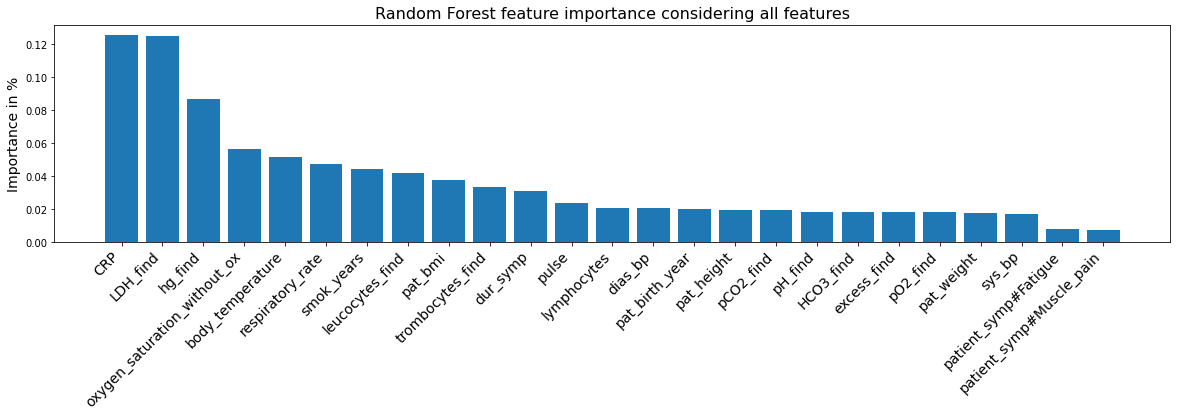

In [68]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=0)
clf.fit(features, label)

x_values = data_training.columns[np.argsort(clf.feature_importances_)][::-1][:25]
y_values = clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1][:25]

fig, ax = plt.subplots(figsize=(20, 4))
bar = ax.bar(x_values, y_values)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")
ax.set_title('Random Forest feature importance considering all features', fontsize=16)
ax.set_ylabel('Importance in %', fontsize=14)
plt.show()

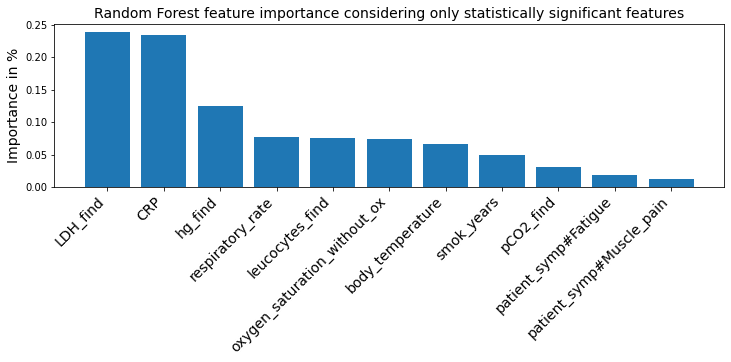

In [69]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=0)
clf.fit(features_sign, label)

x_values = signif_features.columns[np.argsort(clf.feature_importances_)][::-1]
y_values = clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1]

fig, ax = plt.subplots(figsize=(12, 3))
bar = ax.bar(x_values, y_values)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")
ax.set_title('Random Forest feature importance considering only statistically significant features', fontsize=14)
ax.set_ylabel('Importance in %', fontsize=14)
plt.show()

f:\Anaconda\envs\Bachelor_Thesis_V2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


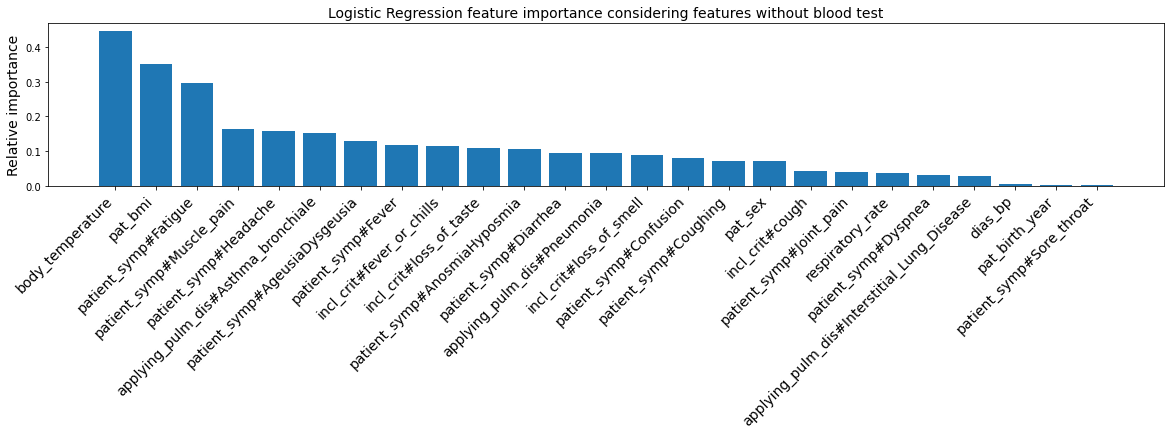

In [70]:
clf = LogisticRegression()
clf.fit(features_no_bt, label)

x_values = data_training.drop(blood_test_features, axis=1).columns[np.argsort(clf.coef_[0])][::-1][:25]
y_values = clf.coef_[0][np.argsort(clf.coef_[0])][::-1][:25]

fig, ax = plt.subplots(figsize=(20, 3))
bar = ax.bar(x_values, y_values)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")
ax.set_title('Logistic Regression feature importance considering features without blood test', fontsize=14)
ax.set_ylabel('Relative importance', fontsize=14)
plt.show()

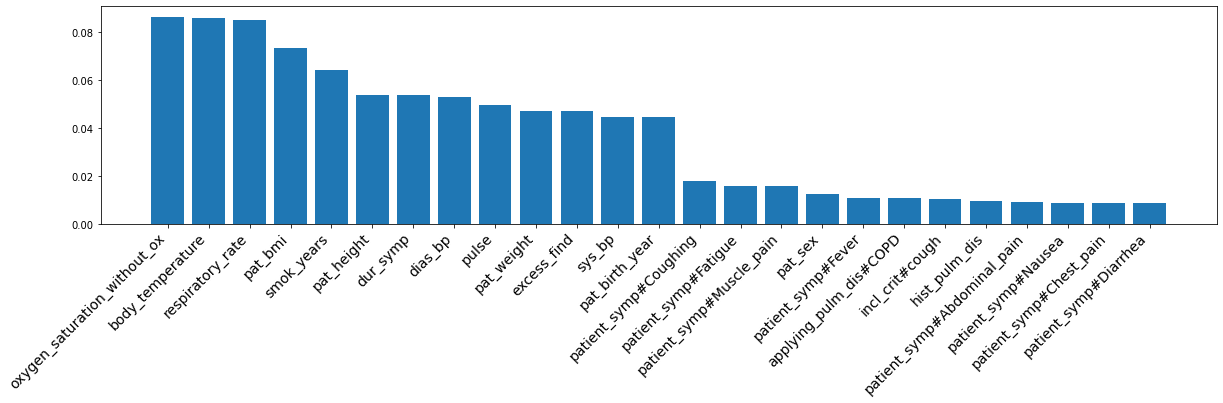

In [27]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=0)
clf.fit(features_no_bt, label)

x_values = data_training.drop(blood_test_features, axis=1).columns[np.argsort(clf.feature_importances_)][::-1][:25]
y_values = clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1][:25]

fig, ax = plt.subplots(figsize=(20, 4))
bar = ax.bar(x_values, y_values)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")
plt.show()